In [1]:
%matplotlib ipympl
%matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



train_set_or = pd.read_csv("./train_set.csv")
train_set = pd.read_csv("./train_set_ohe.csv")
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departure_FRA                        83624 non-null  float64
 1   Departure_STN                        83624 non-null  float64
 2   Departure_SXF                        83624 non-null  float64
 3   Destination_FRA                      83624 non-null  float64
 4   Destination_STN                      83624 non-null  float64
 5   Destination_SXF                      83624 non-null  float64
 6   Price_Dev_Cat_Falling                83624 non-null  float64
 7   Price_Dev_Cat_Rising                 83624 non-null  float64
 8   Price_Dev_Cat_Steady                 83624 non-null  float64
 9   Request_Day                          83624 non-null  float64
 10  Flight_Day                           83624 non-null  float64
 11  buy                         

In [2]:
customFeaturesDf = train_set[["Departure_FRA", "Departure_STN", "Departure_SXF", "Destination_FRA", "Destination_STN", "Destination_SXF", "Price_Dev_Cat_Falling", 
                                  "Price_Dev_Cat_Rising", "Price_Dev_Cat_Steady", "Price_In_Eur",
                                  "Price_Dev", "Price_Dev_Three_Days", "Same_Day_Request_route_Flight_price",
                                  "Request_Month", "Request_Time", "Request_Day", "Flight_Day", "Departure_hour",
                                  "Hours_to_Flight", "Request_Count", "Request_Count_Sum", "Last_Request_Bool", "Is_Holiday_UK", "Is_Holiday_GER",
                                  "Is_School_Holiday_BER", "Is_School_Holiday_FRA", "Is_School_Holiday_UK", "buy"]]
customFeaturesDf.head()

,Departure_FRA,Departure_STN,Departure_SXF,Destination_FRA,Destination_STN,Destination_SXF,Price_Dev_Cat_Falling,Price_Dev_Cat_Rising,Price_Dev_Cat_Steady,Price_In_Eur,...,Hours_to_Flight,Request_Count,Request_Count_Sum,Last_Request_Bool,Is_Holiday_UK,Is_Holiday_GER,Is_School_Holiday_BER,Is_School_Holiday_FRA,Is_School_Holiday_UK,buy
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,208.07,...,56,1.0,4,0,0,0,1,0,0,1
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,259.07,...,44,2.0,4,0,0,0,1,0,0,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,259.07,...,32,3.0,4,0,0,0,1,0,0,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,259.07,...,20,4.0,4,1,0,0,1,0,0,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,143.86,...,58,1.0,4,0,0,0,1,0,0,1


In [ ]:
X_train = customFeaturesDf.iloc[:,0:-1]
y_train = customFeaturesDf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(customFeaturesDf.iloc[:,0:-1],customFeaturesDf.iloc[:,-1],
                                                        test_size=0.25, random_state=42, shuffle=True, stratify=df["sentiment"])

print("Shape of tweets_train:", tweets_train.shape)
print("Shape of tweets_test:", tweets_test.shape)
print("Shape of sentiment_train:", y_train.shape)
print("Shape of sentiment_test:", y_test.shape, "\n")

In [10]:
X_train = customFeaturesDf.iloc[:,0:-1]
y_train = customFeaturesDf.iloc[:,-1]

scaler = StandardScaler(with_mean=False)

# scale variance to 1
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

c:\Users\Hung\Desktop\datamining\.venv\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


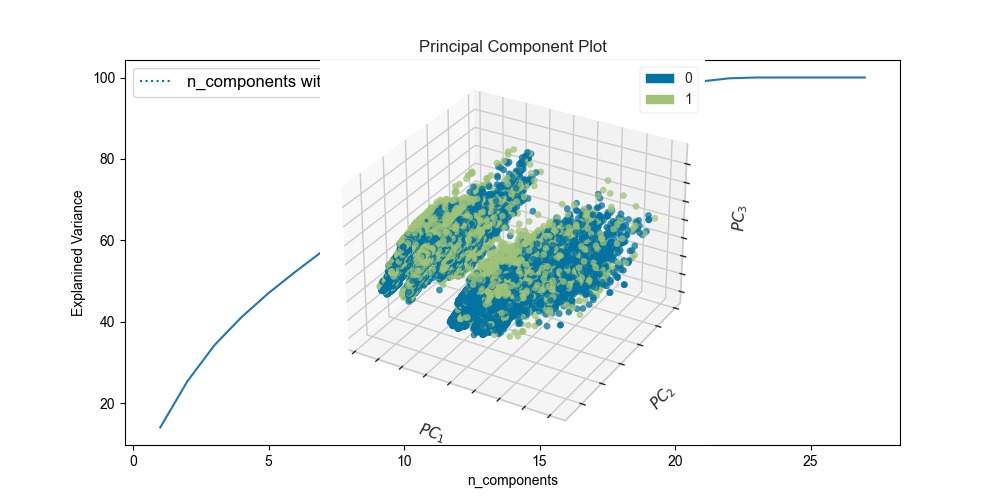

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [14]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True, projection=3)
visualizer.fit_transform(X_scaled, y_train)
visualizer.show()

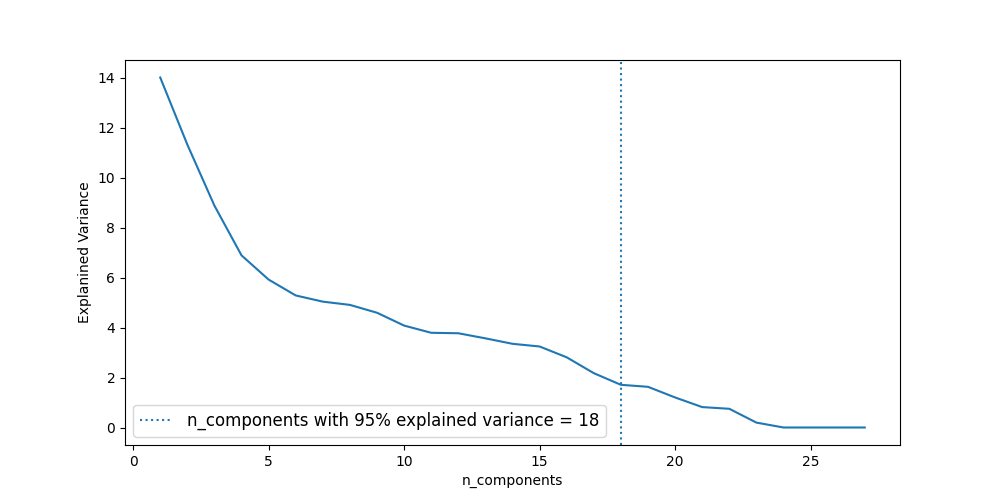

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
n_95=np.argmax(np.cumsum(pca.explained_variance_ratio_ *100) >= 95)+1#n component with 95% explained variance 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, pca.n_components_ + 1),pca.explained_variance_ratio_*100) #kumulierte summe der erklärten variance
ax.axvline(
    np.argmax(np.cumsum(pca.explained_variance_ratio_ *100) >= 95)+1,
    linestyle=":",
    label=f"n_components with 95% explained variance = {n_95}",
)
ax.set_ylabel("Explanined Variance")
ax.set_xlabel("n_components")
ax.legend(prop=dict(size=12))

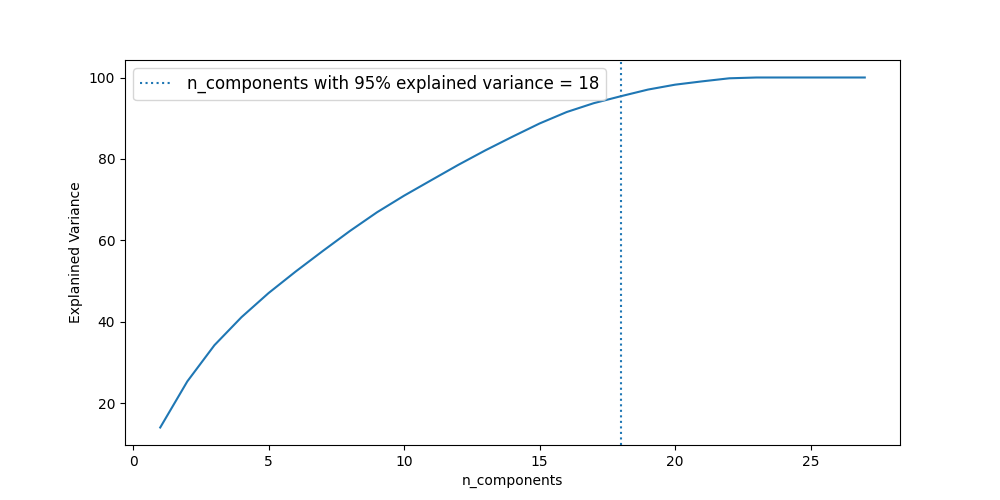

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
n_95=np.argmax(np.cumsum(pca.explained_variance_ratio_ * 100) >= 95)+1 #n component with 95% explained variance 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_ *100)) #kumulierte summe der erklärten variance
ax.axvline(
    n_95,
    linestyle=":",
    label=f"n_components with 95% explained variance = {n_95}",
)
ax.set_ylabel("Explanined Variance")
ax.set_xlabel("n_components")
ax.legend(prop=dict(size=12))


In [9]:
np.cumsum(pca.explained_variance_ratio_ *100)

array([ 14.01801899,  25.34955106,  34.23538701,  41.12886365,
        47.05334899,  52.34197889,  57.3828066 ,  62.29341142,
        66.8892925 ,  70.97150495,  74.76474192,  78.53949593,
        82.11035388,  85.46263031,  88.70726701,  91.51826691,
        93.69457088,  95.40449394,  97.03374292,  98.23708574,
        99.05441015,  99.80369861, 100.        , 100.        ,
       100.        , 100.        , 100.        ])

In [13]:
# reduced featured space to 18 with PCA
pca2 = PCA(n_components=0.95)
pca2.fit(X_scaled) # only fit to train data
X_reduced=pca2.transform(X_scaled)
X_reduced.shape

(83624, 18)

In [78]:
clf = SVC()
scores = cross_val_score(clf, X_scaled, y_train, cv=10, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
clf = SVC()
scores = cross_val_score(clf, X_reduced, y_train, cv=10, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.16


In [6]:
#SVM hyper params opti
from sklearn.model_selection import GridSearchCV

    # Set the parameters by cross-validation
    # Small Weight: Smaller C value, large margin violations.
    # Larger Weight: Larger C value, fewer margin violations.
    # The same for gamma and degree

parameters = [
        {
            'kernel': ['rbf'],
            'gamma': [0.01, 0.1, 5],
            'C': [1, 10, 100]
         },
        {
            'kernel': ['linear'],
            'C': [1, 10, 100]
        },
        {
            'kernel': ['poly'],
            'C': [1, 10, 100],
            'degree': [3, 5, 10]
        }
    ]

grid = GridSearchCV(
        SVC(), parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=10
    )

# print(clf.get_params().keys())
grid.fit(X_reduced, y_train)

print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
      print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.694 (+/-0.241) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.636 (+/-0.261) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.767 (+/-0.020) for {'C': 1, 'gamma': 5, 'kernel': 'rbf'}
0.652 (+/-0.300) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.554 (+/-0.276) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.755 (+/-0.037) for {'C': 10, 'gamma': 5, 'kernel': 'rbf'}
0.611 (+/-0.308) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.557 (+/-0.238) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.755 (+/-0.037) for {'C': 100, 'gamma': 5, 'kernel': 'rbf'}
0.788 (+/-0.009) for {'C': 1, 'kernel': 'linear'}
0.788 (+/-0.009) for {'C': 10, 'kernel': 'linear'}
0.788 (+/-0.009) for {'C': 100, 'kernel': 'linear'}
0.719 (+/-0.137) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.708 (+/-0.177) for {'C': 1, 'degree': 5, 'kernel': 'poly'

In [89]:
# The model quality evaluation function expects a Pandas dataframe with at least the following columns:
# Request_Date          int64
# flight_unique_id     object
# Price               float64
# buy                    bool

def model_quality_evaluation(df):
    # Make a copy of the provided dataframe as to not modify the original.
    df = df.copy()

    # Convert 'Price' to whole cents and store as integers to avoid floating point errors.
    df['Price'] = df['Price'] * 100
    df['Price'] = df['Price'].astype(int)

    # Initialize a variable that stores the sum of all our balances.
    sum_balances = 0

    # Get a list of all 'flight_unique_id'.
    flight_unique_ids = df['flight_unique_id'].unique()

    # Iterate over all 'flight_unique_id'.
    for flight_unique_id in flight_unique_ids:
        # Get a subset of the data for the specified 'flight_unique_id'.
        df_subset = df[df['flight_unique_id'] == flight_unique_id]

        # Get all request dates except for the latest request date before departure.
        # At the latest request date before departure we need to buy a ticket anyway,
        # so we don't care about this specific request date.
        request_dates = df_subset[df_subset['Request_Date'] != df_subset['Request_Date'].max()]

        # Make sure request dates are sorted in descending order.
        request_dates.sort_values(by='Request_Date', ascending=False, inplace=True)

        # Get the ticket price from the latest request date before departure,
        # because we certainly have to buy a ticket at this date.
        last_buying_price = df_subset[df_subset['Request_Date'] == df_subset['Request_Date'].max()]['Price'].values[0]

        # Iterate over the remaining request dates
        for _, row in request_dates.iterrows():
            # and check wether the model wants to buy a ticket at the specific request date.
            if(row['buy'] == 1):
                # If the model decides to buy a ticket the last buying price is set to the
                # price point of this request date and the balance doesn't change.
                last_buying_price = row['Price']
            else:
                # If the models decides to not buy a ticket the balance equals the
                # the current ticket price minus the last buying price.
                current_price = row['Price']
                balance = current_price - last_buying_price

                # The balance is added to the sum of all balances.
                sum_balances = sum_balances + balance

    # Return the sum of all our previously calculated balances.
    return sum_balances / 100

In [ ]:
import numpy as np
from sklearn.metrics import fbeta_score, make_scorer
def my_custom_loss_func(y_true, y_pred):
    diff = np.abs(y_true - y_pred).max()
    return np.log1p(diff)

# score will negate the return value of my_custom_loss_func,
# which will be np.log(2), 0.693, given the values for X
# and y defined below.
score = make_scorer(my_custom_loss_func, greater_is_better=False)
X = [[1], [1]]
y = [0, 1]
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(X, y)
my_custom_loss_func(y, clf.predict(X))
score(clf, X, y)

In [9]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_scaled, y_train)
custom_scoring(y_train, clf.predict(X_scaled))

C:\Users\Hung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


-2804476.77


-2804476.77

In [6]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_scaled, y_train)
y_predict = clf.predict(X_scaled)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_predict))

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for train, test in skf.split(X_train, y_train):
    print('train -  {} |   test -  {}'.format(
    np.bincount(y_train[train]), np.bincount(y_train[test])))

train -  [58415 16846] |   test -  [6491 1872]
train -  [58415 16846] |   test -  [6491 1872]
train -  [58415 16846] |   test -  [6491 1872]
train -  [58415 16846] |   test -  [6491 1872]
train -  [58416 16846] |   test -  [6490 1872]
train -  [58416 16846] |   test -  [6490 1872]
train -  [58416 16846] |   test -  [6490 1872]
train -  [58416 16846] |   test -  [6490 1872]
train -  [58415 16847] |   test -  [6491 1871]
train -  [58415 16847] |   test -  [6491 1871]


In [17]:
clf = SVC()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
money_scores = []

# for each fold create a dataframe
for train_index, test_index in skf.split(X_train, y_train): # split() return index of each fold
	# get each fold train, test fold with index index 
	x_train_fold, x_test_fold = X_reduced[train_index], X_reduced[test_index]
	y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
	clf.fit(x_train_fold, y_train_fold)
	y_pred = clf.predict(x_test_fold)
	
	X_train_1 = train_set_or.loc[test_index]
	df = pd.DataFrame(x_test_fold)
	df["buy"] = y_pred
	df["flight_unique_id"] = X_train_1["flight_unique_id"]
	df["Request_Date"] = X_train_1["Request_Date"]
	df["Price"] = X_train_1["Price_In_Eur"]
	# eval with custom func and append
	score = model_quality_evaluation(df)
	money_scores.append(score)

# Print the output.
print('List of possible accuracy:', money_scores)
print('\nMaximum Money That can be obtained from this model is:',
	max(money_scores))
print('\nMinimum Money:',
	min(money_scores))
print('\nOverall Money:',
	np.mean(money_scores))
print('\nStandard Deviation is:', np.std(money_scores))

NameError: name 'model_quality_evaluation' is not defined

In [ ]:
print('List of possible accuracy:', money_scores)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(money_scores))
print('\nMinimum Accuracy:',
	min(money_scores))
print('\nOverall Accuracy:',
	np.mean(money_scores))
print('\nStandard Deviation is:', np.stdev(money_scores))

In [119]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
money_scores = []

for train_index, test_index in skf.split(X_train, y_train):
	x_train_fold, x_test_fold = X_reduced[train_index], X_reduced[test_index]
	y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
	df = pd.DataFrame(x_test_fold)
	train_set_or_1 = train_set_or.loc[test_index]

In [120]:
train_set_or_1

,index,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
1,2,2019-06-03T23:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
13,14,2019-06-04T11:00:00Z,2019-06-06,6,2019-06-06 FR 144,SXF-STN,73.43,61.19,0
36,37,2019-06-03T23:00:00Z,2019-06-06,19,2019-06-06 FR 147,STN-SXF,143.86,120.68,0
40,41,2019-06-03T11:00:00Z,2019-06-06,19,2019-06-06 FR 1547,STN-FRA,44.53,58.61,1
52,53,2019-06-03T23:00:00Z,2019-06-07,6,2019-06-07 FR 144,SXF-STN,259.07,88.73,0
...,...,...,...,...,...,...,...,...,...
83557,83558,2019-07-01T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,17.99,12.99,0
83560,83561,2019-07-02T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,17.99,12.99,0
83581,83582,2019-07-13T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,34.26,12.99,0
83606,83607,2019-07-25T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,12.99,12.99,1
